# Credits goes to all Kagglers and Code Golf team members sharing code to public

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df = pd.read_csv("/kaggle/input/code-golf-update-public-task-scores/public_task_score_lb.csv")
warnings.filterwarnings("ignore", category=RuntimeWarning)
df['task'] = df['task'].astype(str).str.zfill(3)
scores_df = df.set_index("task")
user_columns = scores_df.columns
scores_df = scores_df.apply(pd.to_numeric, errors="coerce")
lb_score_df = scores_df.apply(lambda x: x.dropna().min(), axis=1)
lb_score_df.columns = ["code_bytes"]
tasks_solved = lb_score_df.notna().sum()
tasks_code_bytes = lb_score_df.sum()
lb_score = 2500*tasks_solved - tasks_code_bytes
tasks_solved, tasks_code_bytes, lb_score

from IPython.display import display, HTML
display(HTML(f"""
<div style="font-family: monospace; font-size: 16px;">
    <p><strong>Total tasks:</strong> <span style="color: #1f77b4;">{df.shape[0]}</span></p>
    <p><strong>Total users:</strong> <span style="color: #ff7f0e;">{df.shape[1] - 1}</span></p>
    <p><strong style="color: green;">✅ Total Tasks Solved:</strong> <span style="color: green; font-weight: bold;">{tasks_solved}</span></p>
    <p><strong>Total Avg Task Bytes:</strong> <span style="color: #9467bd;">{tasks_code_bytes/tasks_solved:.2f}</span></p>
    <p><strong style="color: red; font-size: 18px;">🏆 Total LB Score:</strong> <span style="color: red; font-weight: bold; font-size: 20px;">{lb_score}</span></p>
</div>
"""))

In [2]:
from IPython.display import display, Markdown, Latex
top_score_rows = []
for task, row in scores_df.iterrows():
    min_val = row.min()
    top_users = row[row == min_val].dropna().index.tolist()
    top_score_rows.append({
        "task": task,
        "top_score": min_val,
        "top_users": '|'.join(top_users)
    })
top_scores_df = pd.DataFrame(top_score_rows)
top_scores_df = top_scores_df.sort_values(['top_score'])

display(Markdown(top_scores_df.set_index("task").to_markdown()))

|   task |   top_score | top_users                                                                                                                                                                                                                 |
|-------:|------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|    155 |          18 | 4atj|rucin93|ovs|mukundan|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali         |
|    210 |          20 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|biz|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali |
|    116 |          20 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|KN|kabutack|biz|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali               |
|    172 |          20 | 4atj|rucin93|ovs|mukundan|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali         |
|    241 |          21 | att|joking+MWI|luke|HETHAT                                                                                                                                                                                                |
|    053 |          21 | 4atj|ovs|att|xsot|joking+MWI|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|HETHAT|dbdr|nauti|jacekwl                                                                                                                 |
|    179 |          21 | att|joking+MWI|luke|HETHAT                                                                                                                                                                                                |
|    385 |          25 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|kabutack|biz|MasukenSamba|Potatoman                                                       |
|    113 |          25 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|KN|kabutack|biz|MasukenSamba|Potatoman                                                    |
|    249 |          26 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|MasukenSamba|Ali                                           |
|    380 |          27 | att|joking+MWI|luke|HETHAT                                                                                                                                                                                                |
|    103 |          29 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|luke|kg583|sisyphus|HashPanda|MeWhenI|HETHAT|nauti|biz                                                                                                                    |
|    376 |          30 | 4atj|att|xsot|luke|sisyphus|Seek64|nauti|jacekwl                                                                                                                                                                          |
|    326 |          30 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|HETHAT|nauti|kabutack|MasukenSamba                                                                                     |
|    150 |          30 | 4atj|rucin93|ovs|mukundan|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Ali                   |
|    301 |          31 | 4atj|ovs|mukundan|xsot|joking+MWI|duckyluuk|luke|kg583|sisyphus|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|biz                                                                                                                |
|    164 |          32 | 4atj|rucin93|ovs|mukundan|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali         |
|    135 |          32 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|kabutack|MasukenSamba                                                       |
|    311 |          32 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|biz|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali |
|    067 |          33 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|mji|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|nauti|jacekwl|kabutack|MasukenSamba                                                        |
|    140 |          36 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Ali                             |
|    087 |          36 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|KN|kabutack|scpchicken|el_presidente|MasukenSamba|Potatoman|Ali     |
|    339 |          37 | 4atj|ovs|mukundan|att|xsot|natte|luke|kg583|sisyphus|Seek64|HashPanda|cg|HETHAT|nauti|jacekwl|kabutack                                                                                                                    |
|    276 |          38 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|HETHAT|Bulmenisaurus|nauti|kabutack                                                                                            |
|    309 |          38 | 4atj|ovs|att|xsot|joking+MWI|duckyluuk|luke|kg583|sisyphus|HashPanda|MeWhenI|HETHAT|Bulmenisaurus|nauti|kabutack|biz                                                                                                      |
|    032 |          39 | att|joking+MWI|luke|HETHAT                                                                                                                                                                                                |
|    373 |          39 | 4atj|att|luke                                                                                                                                                                                                             |
|    262 |          39 | joking+MWI|luke                                                                                                                                                                                                           |
|    142 |          40 | 4atj|ovs|mukundan|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|kabutack|MasukenSamba                                                                         |
|    152 |          40 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|Seek64|HashPanda|MeWhenI|cg|HETHAT|Bulmenisaurus|dbdr|nauti|jacekwl|kabutack|MasukenSamba                                                       |
|    056 |          40 | joking+MWI                                                                                                                                                                                                                |
|    052 |          40 | 4atj|mukundan|natte|luke|HETHAT|kabutack                                                                                                                                                                                  |
|    083 |          40 | 4atj|rucin93|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|mji|Seek64|HashPanda|MeWhenI|cg|HETHAT|dbdr|nauti|jacekwl|KN|kabutack|MasukenSamba                                                      |
|    231 |          43 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|cg|HETHAT|nauti|kabutack|MasukenSamba                                                                                                           |
|    016 |          43 | 4atj|luke                                                                                                                                                                                                                 |
|    312 |          44 | luke                                                                                                                                                                                                                      |
|    360 |          45 | 4atj|ovs|mukundan|att|joking+MWI|luke|kg583|sisyphus|HETHAT|MasukenSamba                                                                                                                                                  |
|    045 |          45 | 4atj|ovs|luke                                                                                                                                                                                                             |
|    215 |          46 | 4atj|att|luke|Seek64                                                                                                                                                                                                      |
|    337 |          46 | 4atj|rucin93|ovs|mukundan|luke|Seek64                                                                                                                                                                                     |
|    073 |          46 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|natte|luke|sisyphus|Seek64|HETHAT|nauti                                                                                                                                   |
|    297 |          47 | 4atj|ovs|mukundan|att|xsot|duckyluuk|natte|luke|kg583|sisyphus|Seek64|cg|HETHAT|Bulmenisaurus|nauti|kabutack|Potatoman                                                                                                    |
|    261 |          47 | att|luke|HETHAT                                                                                                                                                                                                           |
|    129 |          47 | 4atj|att|joking+MWI|luke|sisyphus|HETHAT                                                                                                                                                                                  |
|    031 |          47 | att|luke                                                                                                                                                                                                                  |
|    267 |          48 | luke                                                                                                                                                                                                                      |
|    372 |          48 | 4atj|ovs|mukundan|att|natte|luke|kg583|sisyphus                                                                                                                                                                           |
|    322 |          48 | luke                                                                                                                                                                                                                      |
|    211 |          48 | 4atj|ovs|xsot|joking+MWI|luke|sisyphus|Seek64|MeWhenI                                                                                                                                                                     |
|    060 |          48 | 4atj|ovs|mukundan|luke|sisyphus                                                                                                                                                                                           |
|    041 |          49 | 4atj|ovs|att|joking+MWI|luke|kg583|sisyphus|Seek64|dbdr|kabutack|MasukenSamba                                                                                                                                             |
|    057 |          49 | att                                                                                                                                                                                                                       |
|    082 |          50 | 4atj|ovs|mukundan|joking+MWI|natte|luke|kabutack                                                                                                                                                                          |
|    347 |          50 | 4atj|ovs|mukundan|att|xsot|luke|sisyphus                                                                                                                                                                                  |
|    006 |          51 | 4atj|ovs|mukundan|att|xsot|luke|sisyphus                                                                                                                                                                                  |
|    038 |          51 | luke|sisyphus                                                                                                                                                                                                             |
|    307 |          51 | sisyphus                                                                                                                                                                                                                  |
|    386 |          52 | 4atj|ovs|mukundan|att|xsot|luke|sisyphus                                                                                                                                                                                  |
|    026 |          52 | 4atj|ovs|mukundan|att|luke|sisyphus                                                                                                                                                                                       |
|    223 |          52 | att|xsot|sisyphus                                                                                                                                                                                                         |
|    375 |          53 | 4atj|ovs|mukundan|luke|sisyphus|Seek64|kabutack                                                                                                                                                                           |
|    329 |          54 | 4atj|ovs|mukundan|att|xsot|luke|Seek64|nauti|kabutack|MasukenSamba                                                                                                                                                        |
|    242 |          54 | 4atj|luke|sisyphus|kabutack                                                                                                                                                                                               |
|    100 |          54 | 4atj|biz                                                                                                                                                                                                                  |
|    171 |          54 | att                                                                                                                                                                                                                       |
|    299 |          54 | mukundan|joking+MWI|luke                                                                                                                                                                                                  |
|    197 |          54 | 4atj|ovs|mukundan|att|joking+MWI|luke|kg583|sisyphus|Seek64|cg|HETHAT|dbdr|nauti|kabutack|MasukenSamba                                                                                                                    |
|    295 |          54 | att|luke                                                                                                                                                                                                                  |
|    177 |          55 | 4atj|ovs|natte|luke|kg583|sisyphus|cg|HETHAT|nauti|kabutack                                                                                                                                                               |
|    321 |          55 | luke                                                                                                                                                                                                                      |
|    178 |          55 | 4atj|luke|sisyphus                                                                                                                                                                                                        |
|    298 |          55 | joking+MWI|Seek64                                                                                                                                                                                                         |
|    047 |          55 | 4atj|ovs|natte|luke                                                                                                                                                                                                       |
|    377 |          55 | 4atj|luke|sisyphus                                                                                                                                                                                                        |
|    227 |          55 | 4atj                                                                                                                                                                                                                      |
|    085 |          56 | joking+MWI                                                                                                                                                                                                                |
|    395 |          56 | 4atj|luke|sisyphus                                                                                                                                                                                                        |
|    126 |          56 | luke                                                                                                                                                                                                                      |
|    292 |          56 | luke|sisyphus                                                                                                                                                                                                             |
|    108 |          57 | sisyphus                                                                                                                                                                                                                  |
|    043 |          57 | 4atj|att                                                                                                                                                                                                                  |
|    252 |          57 | luke                                                                                                                                                                                                                      |
|    389 |          57 | 4atj|att|luke|sisyphus|biz                                                                                                                                                                                                |
|    146 |          58 | ovs|mukundan|xsot|joking+MWI|luke|sisyphus                                                                                                                                                                                |
|    332 |          58 | luke                                                                                                                                                                                                                      |
|    287 |          59 | luke                                                                                                                                                                                                                      |
|    144 |          59 | 4atj|att|luke|sisyphus                                                                                                                                                                                                    |
|    317 |          59 | luke|sisyphus                                                                                                                                                                                                             |
|    318 |          60 | biz                                                                                                                                                                                                                       |
|    072 |          60 | 4atj                                                                                                                                                                                                                      |
|    003 |          60 | ovs                                                                                                                                                                                                                       |
|    293 |          60 | att|joking+MWI|luke                                                                                                                                                                                                       |
|    236 |          60 | 4atj                                                                                                                                                                                                                      |
|    111 |          60 | Seek64                                                                                                                                                                                                                    |
|    218 |          60 | luke                                                                                                                                                                                                                      |
|    001 |          61 | 4atj|ovs|mukundan|att|joking+MWI|duckyluuk|natte|luke|kg583|sisyphus|mji|cg|kabutack|biz                                                                                                                                  |
|    388 |          61 | luke                                                                                                                                                                                                                      |
|    232 |          61 | luke|kg583                                                                                                                                                                                                                |
|    078 |          61 | joking+MWI                                                                                                                                                                                                                |
|    258 |          61 | luke|Seek64                                                                                                                                                                                                               |
|    235 |          62 | luke                                                                                                                                                                                                                      |
|    024 |          62 | 4atj|joking+MWI|luke                                                                                                                                                                                                      |
|    303 |          62 | 4atj                                                                                                                                                                                                                      |
|    186 |          62 | 4atj|luke|Seek64                                                                                                                                                                                                          |
|    291 |          62 | duckyluuk                                                                                                                                                                                                                 |
|    214 |          62 | luke                                                                                                                                                                                                                      |
|    084 |          62 | 4atj|luke|biz                                                                                                                                                                                                             |
|    166 |          63 | 4atj                                                                                                                                                                                                                      |
|    296 |          63 | ovs|mukundan|luke                                                                                                                                                                                                         |
|    061 |          63 | 4atj|mukundan|luke                                                                                                                                                                                                        |
|    315 |          63 | luke|sisyphus                                                                                                                                                                                                             |
|    128 |          64 | joking+MWI|luke                                                                                                                                                                                                           |
|    384 |          64 | 4atj|luke|sisyphus                                                                                                                                                                                                        |
|    359 |          64 | 4atj|ovs|mukundan|luke|sisyphus                                                                                                                                                                                           |
|    021 |          64 | att|joking+MWI|luke                                                                                                                                                                                                       |
|    028 |          64 | sisyphus                                                                                                                                                                                                                  |
|    399 |          64 | xsot|luke                                                                                                                                                                                                                 |
|    203 |          64 | Seek64                                                                                                                                                                                                                    |
|    305 |          64 | luke                                                                                                                                                                                                                      |
|    289 |          64 | att|xsot                                                                                                                                                                                                                  |
|    269 |          64 | att|xsot                                                                                                                                                                                                                  |
|    039 |          65 | 4atj|att|natte|luke|Seek64                                                                                                                                                                                                |
|    244 |          65 | luke                                                                                                                                                                                                                      |
|    130 |          65 | 4atj|ovs|mukundan|att|xsot|joking+MWI|duckyluuk|luke|sisyphus                                                                                                                                                             |
|    007 |          65 | luke                                                                                                                                                                                                                      |
|    114 |          65 | ovs|mukundan|joking+MWI|luke|sisyphus|Seek64|HashPanda|nauti                                                                                                                                                              |
|    313 |          66 | luke                                                                                                                                                                                                                      |
|    327 |          67 | joking+MWI|luke                                                                                                                                                                                                           |
|    115 |          67 | luke                                                                                                                                                                                                                      |
|    237 |          67 | att                                                                                                                                                                                                                       |
|    351 |          68 | luke                                                                                                                                                                                                                      |
|    400 |          68 | luke                                                                                                                                                                                                                      |
|    391 |          69 | 4atj|att                                                                                                                                                                                                                  |
|    290 |          69 | mukundan|joking+MWI|luke                                                                                                                                                                                                  |
|    362 |          69 | natte                                                                                                                                                                                                                     |
|    393 |          69 | 4atj|att                                                                                                                                                                                                                  |
|    181 |          69 | ovs|joking+MWI|duckyluuk|sisyphus                                                                                                                                                                                         |
|    014 |          70 | 4atj                                                                                                                                                                                                                      |
|    010 |          70 | luke                                                                                                                                                                                                                      |
|    316 |          71 | mukundan|luke                                                                                                                                                                                                             |
|    334 |          71 | mukundan                                                                                                                                                                                                                  |
|    188 |          72 | 4atj|luke                                                                                                                                                                                                                 |
|    040 |          73 | 4atj                                                                                                                                                                                                                      |
|    229 |          73 | 4atj|att|luke|sisyphus|Seek64                                                                                                                                                                                             |
|    106 |          73 | 4atj|mukundan|luke                                                                                                                                                                                                        |
|    194 |          73 | 4atj|mukundan|luke                                                                                                                                                                                                        |
|    343 |          74 | mukundan|luke                                                                                                                                                                                                             |
|    123 |          75 | 4atj|natte|luke|sisyphus                                                                                                                                                                                                  |
|    127 |          76 | 4atj                                                                                                                                                                                                                      |
|    274 |          76 | mukundan                                                                                                                                                                                                                  |
|    176 |          76 | joking+MWI                                                                                                                                                                                                                |
|    294 |          76 | mukundan|xsot|joking+MWI|luke|kg583|Seek64                                                                                                                                                                                |
|    167 |          77 | 4atj|luke|Seek64                                                                                                                                                                                                          |
|    063 |          77 | 4atj|luke                                                                                                                                                                                                                 |
|    033 |          77 | 4atj|ovs|mukundan|luke                                                                                                                                                                                                    |
|    149 |          77 | luke                                                                                                                                                                                                                      |
|    091 |          78 | att                                                                                                                                                                                                                       |
|    310 |          78 | luke                                                                                                                                                                                                                      |
|    398 |          79 | Seek64                                                                                                                                                                                                                    |
|    180 |          79 | luke                                                                                                                                                                                                                      |
|    243 |          79 | luke                                                                                                                                                                                                                      |
|    248 |          79 | luke|sisyphus                                                                                                                                                                                                             |
|    320 |          80 | luke|kabutack                                                                                                                                                                                                             |
|    004 |          80 | 4atj                                                                                                                                                                                                                      |
|    257 |          81 | luke                                                                                                                                                                                                                      |
|    095 |          81 | luke                                                                                                                                                                                                                      |
|    049 |          81 | 4atj                                                                                                                                                                                                                      |
|    161 |          82 | 4atj|luke|sisyphus|biz                                                                                                                                                                                                    |
|    306 |          82 | att|luke                                                                                                                                                                                                                  |
|    070 |          82 | mukundan                                                                                                                                                                                                                  |
|    147 |          84 | luke                                                                                                                                                                                                                      |
|    207 |          84 | 4atj|luke|sisyphus|Seek64|kabutack|biz                                                                                                                                                                                    |
|    104 |          85 | mukundan                                                                                                                                                                                                                  |
|    352 |          85 | sisyphus                                                                                                                                                                                                                  |
|    132 |          86 | sisyphus                                                                                                                                                                                                                  |
|    259 |          86 | joking+MWI                                                                                                                                                                                                                |
|    075 |          86 | luke                                                                                                                                                                                                                      |
|    271 |          86 | att                                                                                                                                                                                                                       |
|    193 |          86 | sisyphus                                                                                                                                                                                                                  |
|    175 |          87 | jacekwl                                                                                                                                                                                                                   |
|    300 |          87 | att|sisyphus                                                                                                                                                                                                              |
|    055 |          87 | 4atj                                                                                                                                                                                                                      |
|    344 |          87 | mukundan|luke|sisyphus                                                                                                                                                                                                    |
|    092 |          87 | 4atj                                                                                                                                                                                                                      |
|    331 |          88 | joking+MWI                                                                                                                                                                                                                |
|    035 |          88 | mukundan                                                                                                                                                                                                                  |
|    282 |          89 | att                                                                                                                                                                                                                       |
|    200 |          89 | mukundan                                                                                                                                                                                                                  |
|    381 |          90 | sisyphus                                                                                                                                                                                                                  |
|    121 |          90 | sisyphus|biz                                                                                                                                                                                                              |
|    109 |          90 | natte                                                                                                                                                                                                                     |
|    220 |          91 | sisyphus                                                                                                                                                                                                                  |
|    002 |          91 | 4atj                                                                                                                                                                                                                      |
|    022 |          91 | 4atj                                                                                                                                                                                                                      |
|    050 |          92 | sisyphus                                                                                                                                                                                                                  |
|    357 |          92 | sisyphus                                                                                                                                                                                                                  |
|    304 |          92 | sisyphus|biz                                                                                                                                                                                                              |
|    183 |          94 | joking+MWI                                                                                                                                                                                                                |
|    122 |          94 | joking+MWI                                                                                                                                                                                                                |
|    221 |          94 | mukundan                                                                                                                                                                                                                  |
|    283 |          94 | att|luke                                                                                                                                                                                                                  |
|    350 |          95 | 4atj                                                                                                                                                                                                                      |
|    247 |          95 | Seek64                                                                                                                                                                                                                    |
|    251 |          96 | joking+MWI                                                                                                                                                                                                                |
|    256 |          96 | ovs                                                                                                                                                                                                                       |
|    302 |          97 | mukundan                                                                                                                                                                                                                  |
|    008 |          97 | att                                                                                                                                                                                                                       |
|    098 |          98 | mukundan                                                                                                                                                                                                                  |
|    048 |          98 | 4atj                                                                                                                                                                                                                      |
|    254 |          99 | Seek64                                                                                                                                                                                                                    |
|    394 |          99 | biz                                                                                                                                                                                                                       |
|    338 |          99 | 4atj|sisyphus                                                                                                                                                                                                             |
|    162 |         100 | 4atj                                                                                                                                                                                                                      |
|    015 |         100 | 4atj                                                                                                                                                                                                                      |
|    139 |         100 | joking+MWI                                                                                                                                                                                                                |
|    272 |         101 | ovs                                                                                                                                                                                                                       |
|    314 |         101 | mukundan|biz                                                                                                                                                                                                              |
|    065 |         101 | 4atj                                                                                                                                                                                                                      |
|    120 |         101 | mukundan                                                                                                                                                                                                                  |
|    333 |         101 | sisyphus                                                                                                                                                                                                                  |
|    355 |         101 | att                                                                                                                                                                                                                       |
|    346 |         102 | Seek64                                                                                                                                                                                                                    |
|    199 |         102 | joking+MWI                                                                                                                                                                                                                |
|    217 |         103 | sisyphus                                                                                                                                                                                                                  |
|    184 |         103 | joking+MWI                                                                                                                                                                                                                |
|    027 |         103 | Seek64                                                                                                                                                                                                                    |
|    187 |         104 | sisyphus                                                                                                                                                                                                                  |
|    288 |         104 | Seek64                                                                                                                                                                                                                    |
|    081 |         105 | sisyphus                                                                                                                                                                                                                  |
|    074 |         105 | mukundan                                                                                                                                                                                                                  |
|    358 |         105 | sisyphus                                                                                                                                                                                                                  |
|    195 |         105 | att                                                                                                                                                                                                                       |
|    356 |         105 | mukundan|sisyphus                                                                                                                                                                                                         |
|    348 |         105 | mukundan                                                                                                                                                                                                                  |
|    354 |         105 | sisyphus                                                                                                                                                                                                                  |
|    093 |         106 | joking+MWI                                                                                                                                                                                                                |
|    141 |         106 | joking+MWI                                                                                                                                                                                                                |
|    036 |         106 | joking+MWI                                                                                                                                                                                                                |
|    088 |         106 | sisyphus                                                                                                                                                                                                                  |
|    336 |         106 | joking+MWI                                                                                                                                                                                                                |
|    345 |         107 | mukundan                                                                                                                                                                                                                  |
|    136 |         107 | sisyphus                                                                                                                                                                                                                  |
|    204 |         108 | joking+MWI                                                                                                                                                                                                                |
|    174 |         109 | sisyphus                                                                                                                                                                                                                  |
|    009 |         109 | 4atj|sisyphus|biz                                                                                                                                                                                                         |
|    390 |         110 | 4atj                                                                                                                                                                                                                      |
|    112 |         110 | sisyphus                                                                                                                                                                                                                  |
|    154 |         110 | 4atj                                                                                                                                                                                                                      |
|    239 |         111 | ovs                                                                                                                                                                                                                       |
|    286 |         111 | sisyphus                                                                                                                                                                                                                  |
|    190 |         112 | joking+MWI                                                                                                                                                                                                                |
|    365 |         112 | mukundan                                                                                                                                                                                                                  |
|    037 |         112 | mukundan                                                                                                                                                                                                                  |
|    212 |         112 | mukundan                                                                                                                                                                                                                  |
|    213 |         113 | ovs|biz                                                                                                                                                                                                                   |
|    189 |         113 | Seek64                                                                                                                                                                                                                    |
|    240 |         114 | joking+MWI                                                                                                                                                                                                                |
|    138 |         114 | mukundan                                                                                                                                                                                                                  |
|    097 |         115 | joking+MWI                                                                                                                                                                                                                |
|    202 |         116 | mukundan                                                                                                                                                                                                                  |
|    273 |         116 | joking+MWI|Seek64                                                                                                                                                                                                         |
|    160 |         117 | joking+MWI|sisyphus                                                                                                                                                                                                       |
|    216 |         117 | mukundan                                                                                                                                                                                                                  |
|    168 |         118 | joking+MWI                                                                                                                                                                                                                |
|    029 |         118 | att                                                                                                                                                                                                                       |
|    342 |         119 | joking+MWI                                                                                                                                                                                                                |
|    019 |         119 | mukundan                                                                                                                                                                                                                  |
|    266 |         119 | mukundan                                                                                                                                                                                                                  |
|    340 |         120 | mukundan                                                                                                                                                                                                                  |
|    151 |         120 | joking+MWI                                                                                                                                                                                                                |
|    051 |         122 | sisyphus                                                                                                                                                                                                                  |
|    119 |         123 | mukundan                                                                                                                                                                                                                  |
|    079 |         123 | joking+MWI|duckyluuk                                                                                                                                                                                                      |
|    124 |         123 | mukundan                                                                                                                                                                                                                  |
|    371 |         125 | sisyphus                                                                                                                                                                                                                  |
|    353 |         126 | att|xsot|joking+MWI|dbdr                                                                                                                                                                                                  |
|    131 |         126 | att                                                                                                                                                                                                                       |
|    323 |         127 | mukundan                                                                                                                                                                                                                  |
|    198 |         127 | mukundan|sisyphus                                                                                                                                                                                                         |
|    058 |         127 | joking+MWI                                                                                                                                                                                                                |
|    369 |         127 | Seek64                                                                                                                                                                                                                    |
|    030 |         127 | joking+MWI                                                                                                                                                                                                                |
|    230 |         128 | natte|sisyphus                                                                                                                                                                                                            |
|    278 |         128 | Seek64                                                                                                                                                                                                                    |
|    234 |         129 | joking+MWI                                                                                                                                                                                                                |
|    374 |         130 | mukundan                                                                                                                                                                                                                  |
|    196 |         130 | mukundan                                                                                                                                                                                                                  |
|    017 |         131 | att                                                                                                                                                                                                                       |
|    246 |         131 | joking+MWI                                                                                                                                                                                                                |
|    094 |         132 | mukundan                                                                                                                                                                                                                  |
|    335 |         133 | joking+MWI                                                                                                                                                                                                                |
|    011 |         133 | kg583                                                                                                                                                                                                                     |
|    068 |         134 | Seek64                                                                                                                                                                                                                    |
|    169 |         134 | joking+MWI                                                                                                                                                                                                                |
|    397 |         135 | mukundan|xsot                                                                                                                                                                                                             |
|    270 |         135 | sisyphus                                                                                                                                                                                                                  |
|    077 |         136 | sisyphus                                                                                                                                                                                                                  |
|    263 |         136 | ovs                                                                                                                                                                                                                       |
|    279 |         138 | sisyphus                                                                                                                                                                                                                  |
|    159 |         139 | sisyphus                                                                                                                                                                                                                  |
|    165 |         139 | mukundan                                                                                                                                                                                                                  |
|    099 |         140 | Seek64                                                                                                                                                                                                                    |
|    250 |         141 | joking+MWI                                                                                                                                                                                                                |
|    125 |         142 | Seek64                                                                                                                                                                                                                    |
|    185 |         143 | luke                                                                                                                                                                                                                      |
|    379 |         143 | joking+MWI                                                                                                                                                                                                                |
|    137 |         143 | att                                                                                                                                                                                                                       |
|    163 |         143 | att                                                                                                                                                                                                                       |
|    228 |         145 | mukundan                                                                                                                                                                                                                  |
|    330 |         145 | joking+MWI                                                                                                                                                                                                                |
|    341 |         147 | mukundan                                                                                                                                                                                                                  |
|    253 |         148 | ovs                                                                                                                                                                                                                       |
|    107 |         150 | biz                                                                                                                                                                                                                       |
|    245 |         150 | joking+MWI|MeWhenI                                                                                                                                                                                                        |
|    260 |         150 | att                                                                                                                                                                                                                       |
|    062 |         151 | duckyluuk                                                                                                                                                                                                                 |
|    275 |         151 | joking+MWI                                                                                                                                                                                                                |
|    206 |         151 | kg583                                                                                                                                                                                                                     |
|    382 |         151 | att                                                                                                                                                                                                                       |
|    281 |         152 | joking+MWI|natte                                                                                                                                                                                                          |
|    265 |         153 | luke|jacekwl                                                                                                                                                                                                              |
|    226 |         154 | mukundan                                                                                                                                                                                                                  |
|    148 |         154 | luke                                                                                                                                                                                                                      |
|    192 |         154 | mukundan                                                                                                                                                                                                                  |
|    156 |         156 | mukundan                                                                                                                                                                                                                  |
|    013 |         157 | mukundan                                                                                                                                                                                                                  |
|    378 |         159 | mukundan                                                                                                                                                                                                                  |
|    090 |         159 | sisyphus                                                                                                                                                                                                                  |
|    368 |         160 | joking+MWI                                                                                                                                                                                                                |
|    034 |         160 | mukundan                                                                                                                                                                                                                  |
|    383 |         161 | biz                                                                                                                                                                                                                       |
|    064 |         163 | duckyluuk                                                                                                                                                                                                                 |
|    012 |         163 | biz                                                                                                                                                                                                                       |
|    025 |         164 | joking+MWI                                                                                                                                                                                                                |
|    225 |         170 | joking+MWI                                                                                                                                                                                                                |
|    222 |         171 | mukundan                                                                                                                                                                                                                  |
|    117 |         172 | joking+MWI                                                                                                                                                                                                                |
|    102 |         173 | Seek64                                                                                                                                                                                                                    |
|    020 |         175 | joking+MWI                                                                                                                                                                                                                |
|    046 |         176 | joking+MWI                                                                                                                                                                                                                |
|    059 |         176 | mukundan                                                                                                                                                                                                                  |
|    224 |         177 | joking+MWI                                                                                                                                                                                                                |
|    105 |         177 | att                                                                                                                                                                                                                       |
|    392 |         178 | garrymoss                                                                                                                                                                                                                 |
|    042 |         179 | joking+MWI                                                                                                                                                                                                                |
|    182 |         179 | mukundan                                                                                                                                                                                                                  |
|    153 |         184 | joking+MWI                                                                                                                                                                                                                |
|    134 |         186 | Seek64                                                                                                                                                                                                                    |
|    071 |         187 | jacekwl                                                                                                                                                                                                                   |
|    110 |         188 | joking+MWI                                                                                                                                                                                                                |
|    143 |         189 | joking+MWI                                                                                                                                                                                                                |
|    069 |         191 | mukundan                                                                                                                                                                                                                  |
|    280 |         195 | joking+MWI                                                                                                                                                                                                                |
|    328 |         195 | joking+MWI                                                                                                                                                                                                                |
|    145 |         199 | joking+MWI                                                                                                                                                                                                                |
|    023 |         206 | mukundan|sisyphus                                                                                                                                                                                                         |
|    325 |         207 | Seek64                                                                                                                                                                                                                    |
|    170 |         211 | Seek64                                                                                                                                                                                                                    |
|    277 |         211 | joking+MWI                                                                                                                                                                                                                |
|    264 |         222 | joking+MWI                                                                                                                                                                                                                |
|    361 |         226 | garrymoss                                                                                                                                                                                                                 |
|    205 |         234 | joking+MWI                                                                                                                                                                                                                |
|    387 |         234 | joking+MWI                                                                                                                                                                                                                |
|    238 |         247 | joking+MWI                                                                                                                                                                                                                |
|    208 |         249 | mukundan                                                                                                                                                                                                                  |
|    284 |         249 | Potatoman                                                                                                                                                                                                                 |
|    086 |         251 | joking+MWI                                                                                                                                                                                                                |
|    005 |         262 | ovs                                                                                                                                                                                                                       |
|    396 |         266 | Seek64                                                                                                                                                                                                                    |
|    363 |         266 | natte                                                                                                                                                                                                                     |
|    173 |         274 | jacekwl                                                                                                                                                                                                                   |
|    308 |         277 | biz                                                                                                                                                                                                                       |
|    044 |         284 | mukundan                                                                                                                                                                                                                  |
|    349 |         290 | joking+MWI                                                                                                                                                                                                                |
|    157 |         296 | garrymoss                                                                                                                                                                                                                 |
|    201 |         301 | MeWhenI                                                                                                                                                                                                                   |
|    066 |         303 | duckyluuk                                                                                                                                                                                                                 |
|    255 |         309 | duckyluuk                                                                                                                                                                                                                 |
|    364 |         315 | xsot                                                                                                                                                                                                                      |
|    367 |         317 | luke                                                                                                                                                                                                                      |
|    209 |         319 | luke                                                                                                                                                                                                                      |
|    370 |         331 | MeWhenI                                                                                                                                                                                                                   |
|    219 |         334 | joking+MWI                                                                                                                                                                                                                |
|    191 |         334 | MeWhenI                                                                                                                                                                                                                   |
|    089 |         335 | MeWhenI                                                                                                                                                                                                                   |
|    158 |         337 | garrymoss                                                                                                                                                                                                                 |
|    268 |         339 | MeWhenI                                                                                                                                                                                                                   |
|    076 |         355 | ovs                                                                                                                                                                                                                       |
|    101 |         361 | luke                                                                                                                                                                                                                      |
|    096 |         373 | ovs                                                                                                                                                                                                                       |
|    285 |         386 | jacekwl                                                                                                                                                                                                                   |
|    233 |         387 | garrymoss                                                                                                                                                                                                                 |
|    319 |         392 | ovs                                                                                                                                                                                                                       |
|    080 |         399 | MasukenSamba                                                                                                                                                                                                              |
|    118 |         403 | MeWhenI                                                                                                                                                                                                                   |
|    324 |         406 | MeWhenI                                                                                                                                                                                                                   |
|    133 |         425 | MeWhenI                                                                                                                                                                                                                   |
|    018 |         425 | jacekwl                                                                                                                                                                                                                   |
|    054 |         441 | MeWhenI                                                                                                                                                                                                                   |
|    366 |         455 | MeWhenI                                                                                                                                                                                                                   |

<Figure size 1800x900 with 0 Axes>

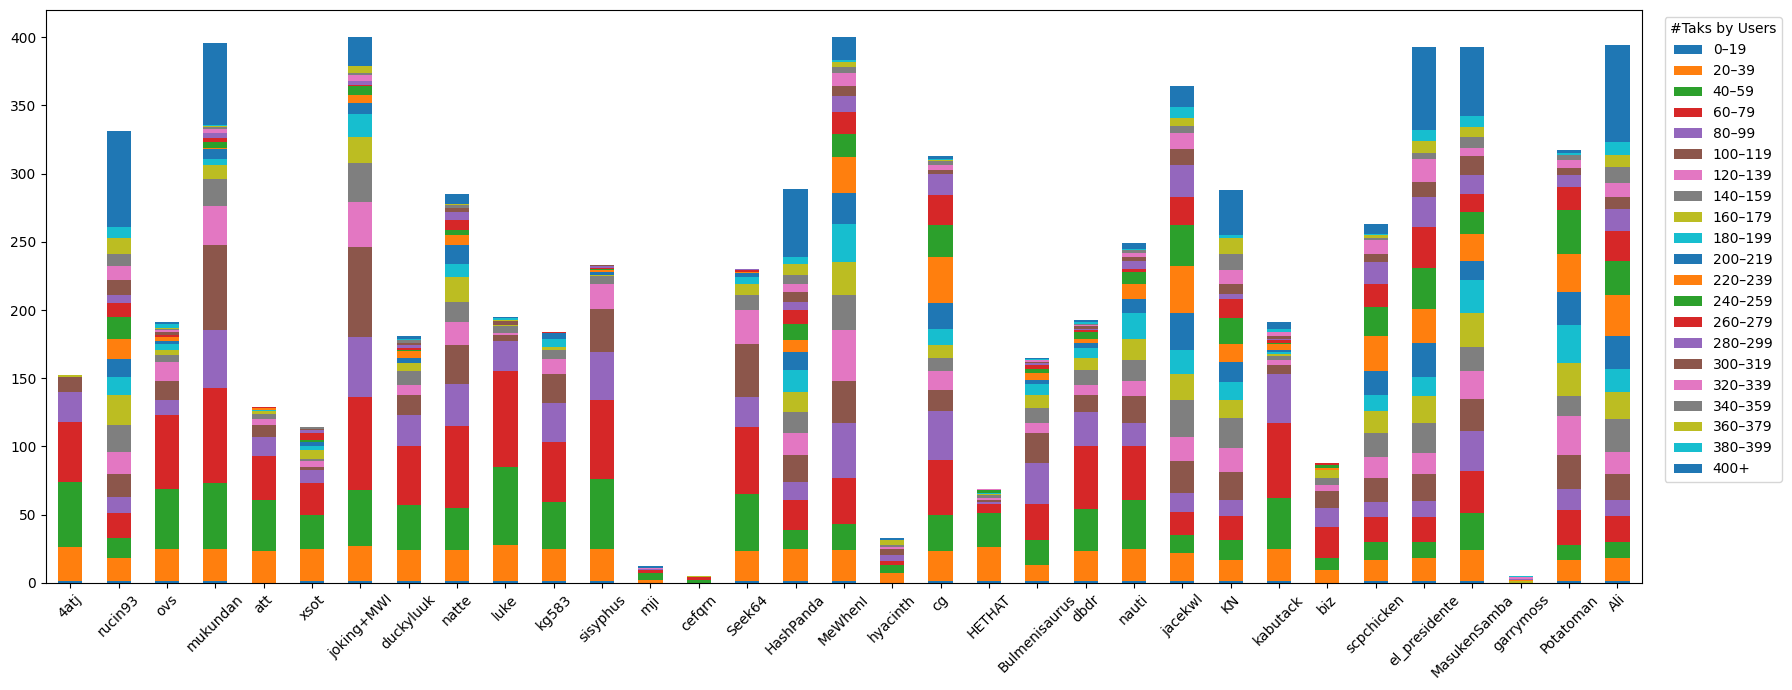

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

bucket_edges = list(range(0, 401, 20))
bucket_labels = [f"{start}–{end - 1}" for start, end in zip(bucket_edges[:-1], bucket_edges[1:])]
bucket_labels.append("400+")

def bucket_fixed(x):
    if pd.isna(x):
        return None
    for i in range(len(bucket_edges) - 1):
        if bucket_edges[i] <= x < bucket_edges[i + 1]:
            return bucket_labels[i]
    return "400+"

bucketed_df = scores_df.apply(lambda col: col.map(bucket_fixed))

bucket_counts = bucketed_df.apply(lambda col: col.value_counts()).fillna(0)
bucket_counts = bucket_counts.reindex(bucket_labels).fillna(0).T

plt.figure(figsize=(18, 9))
bucket_counts.plot(kind="bar", stacked=True, figsize=(18, 7))
plt.xticks(rotation=45)
plt.legend(title="#Taks by Users", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

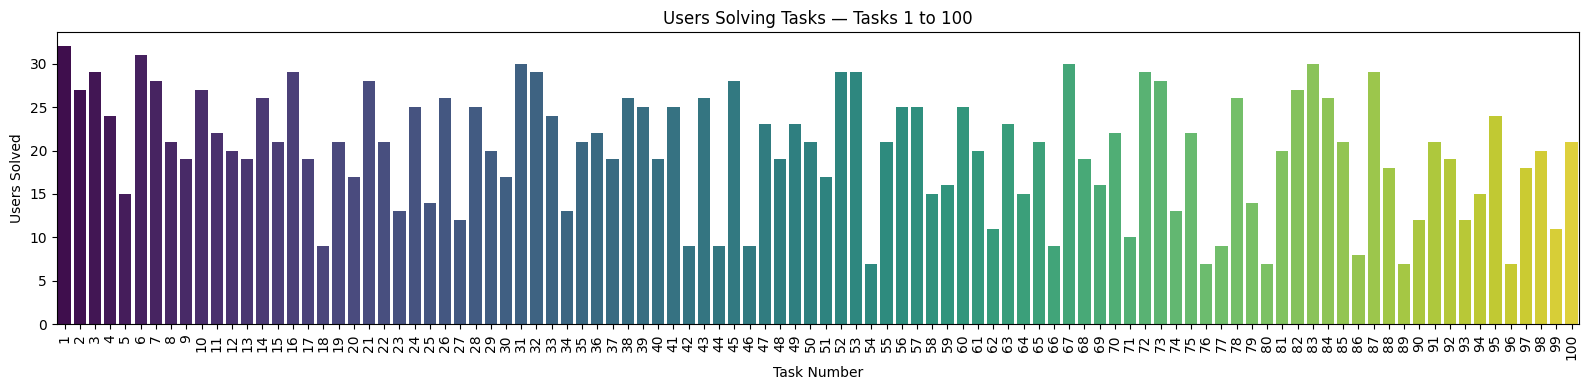

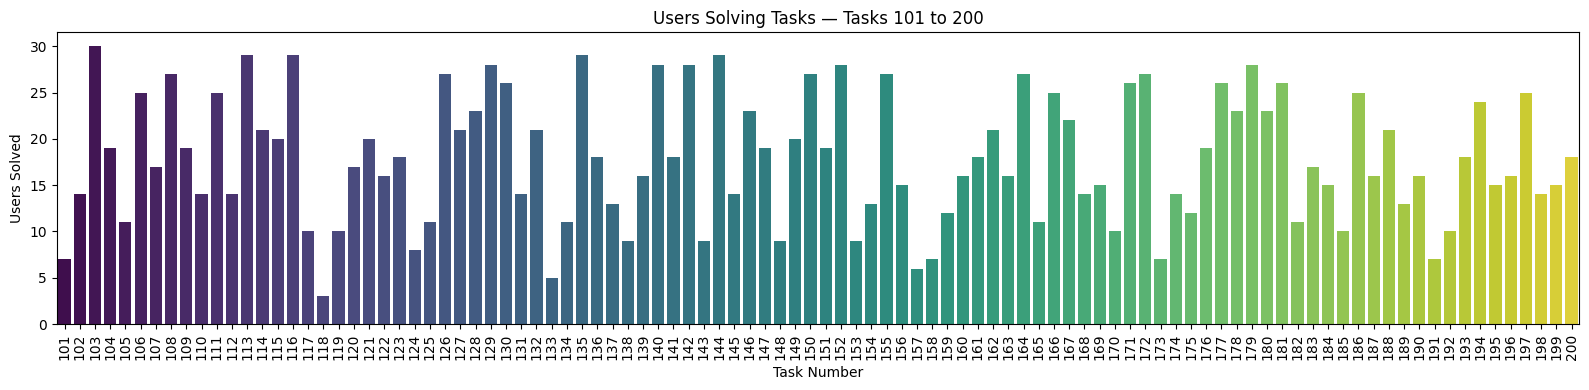

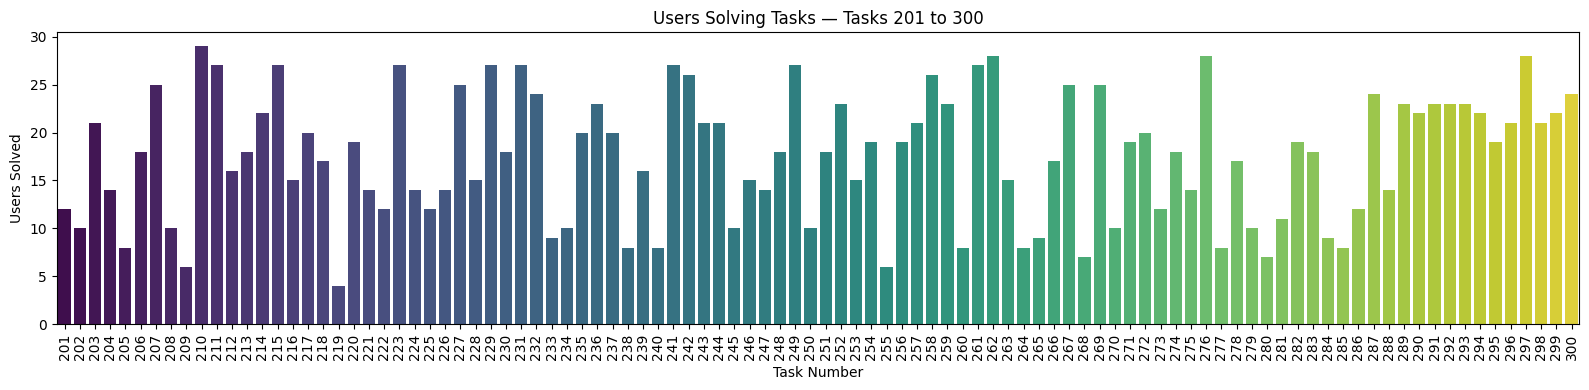

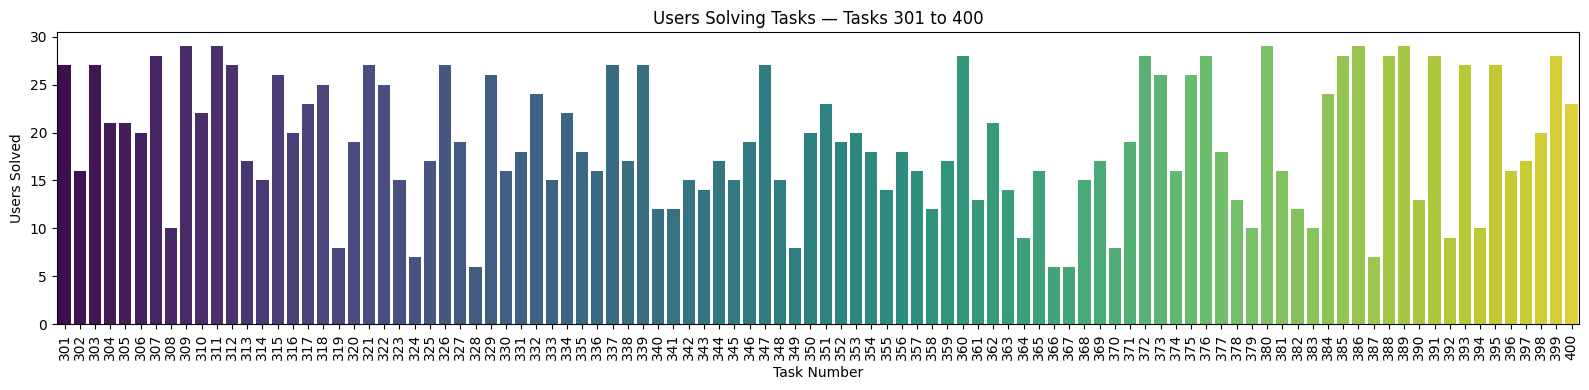

In [4]:
solved_counts = scores_df.notna().sum(axis=1)
solved_df = pd.DataFrame({"task": solved_counts.index, "users_solved": solved_counts.values})
solved_df["task"] = pd.to_numeric(solved_df["task"], errors="coerce")


solved_df = solved_df.sort_values("task").reset_index(drop=True)


chunk_size = 100
num_chunks = len(solved_df) // chunk_size + int(len(solved_df) % chunk_size != 0)
chunks = [solved_df.iloc[i*chunk_size:(i+1)*chunk_size] for i in range(num_chunks)]


for i, chunk in enumerate(chunks):
    plt.figure(figsize=(16, 4))
    sns.barplot(data=chunk, x="task", y="users_solved", palette="viridis")
    plt.title(f"Users Solving Tasks — Tasks {chunk['task'].iloc[0]} to {chunk['task'].iloc[-1]}")
    plt.xlabel("Task Number")
    plt.ylabel("Users Solved")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()